# Neural Nets with Relu function to classify handwritten digits 

In [1]:
#reset 
from IPython import get_ipython;   
get_ipython().magic('reset -sf')

# import necessary packages
from sklearn.datasets import load_digits
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


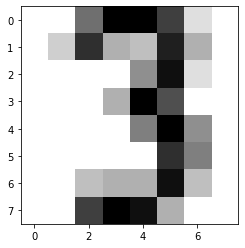

In [2]:
#load dataset
df = load_digits()

#Transform the NumPy 2D array into a pandas dataframe.
fdf = pd.DataFrame(df["data"])

labels = pd.Series(df.target)
fdf["labels"] = labels

#
fdf.columns
fdf.columns=fdf.columns.astype(str)


first_image = fdf.iloc[1300]
first_image = first_image.drop('labels', axis=0)
np_image = first_image.values
np_image = np_image.reshape(8,8)

plt.imshow(np_image, cmap='gray_r')

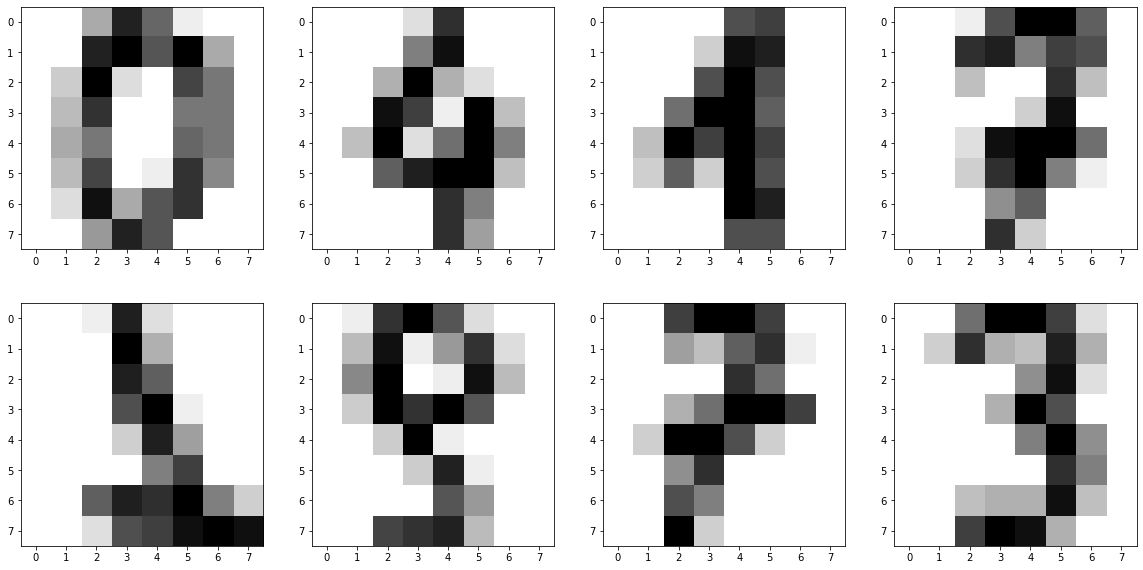

In [3]:
# create visualizations of several sample rows
# we arbitarily choose somme rows in our data to display what these images actually look like. 
fig = plt.figure(figsize=(20,10))
for i in range(0,8):
    ax = fig.add_subplot(2,4,i+1)
    if i < 4:
        image = fdf.iloc[i * 100]
    else:
        image = fdf.iloc[i * 100 + 600]
    image = image.drop('labels', axis=0)
    image = image.values
    image = image.reshape(8,8)
    plt.imshow(image, cmap='gray_r')
plt.show()

In [4]:
# 80/20 split 
    #shuffle index 
np.random.seed(1)
random_index = np.random.permutation(fdf.index)
fdf = fdf.reindex(random_index)

row = int(len(fdf)*.8)
train = fdf.iloc[:row]
test = fdf.iloc[row:]

# import packages 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold

# K-Nearest Neighbors Classifier model 

## We will first try to classify these images using the KNN model using sci-kit learn and compare against the neural net model using the "Accuracy" performance metric.


In [20]:
#KNN using k-fold cross-val
num_folds = [3, 4, 5, 7, 9, 11, 13, 15]
accuracy_kfold = []
# these are the features that will be used to fit the model 
features = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63']

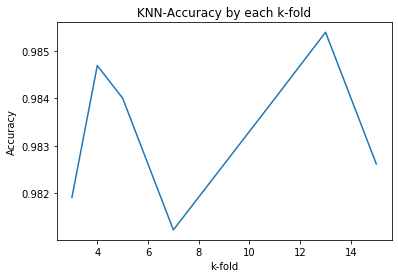

In [6]:
for fold in num_folds:
    kf = KFold(fold, shuffle=True, random_state=1)
    knn = KNeighborsClassifier()
    accuracy = cross_val_score(knn, train[features], train['labels'], scoring="accuracy", cv=kf)
    avg_accuracy = np.mean(accuracy)
    accuracy_kfold.append(avg_accuracy)
    
# plot accuracies depending on the nubmer of folds used 
plt.plot(num_folds,accuracy_kfold)
plt.title('KNN-Accuracy by each k-fold')
plt.xlabel('k-fold')
plt.ylabel('Accuracy')
plt.show()


There are a few downsides to using k-nearest neighbors:

1) high memory usage (for each new unseen observation, many comparisons need to be made to seen observations)

2) no model representation to debug and explore

# Neural Net Model 1: One hidden layer with K-fold Cross Validation


 

In [21]:
# We set the number of neurons 
neurons = [8,16,32,64,128,256]

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


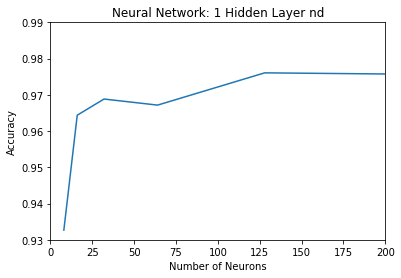

In [15]:
# k-fold cross-validation with single hidden layer neurons with n neurons 
    
accuracies_kfold = []

# Implementing A Neural Network That Performs Classification 
for n in neurons:
    kf = KFold(4, shuffle=True, random_state=1)
    # we set the MLP classifier with 3 hidden layers and the number of neurons 10, 64,128 
    mlp = MLPClassifier(hidden_layer_sizes=(n,), max_iter=1000) 
    accuracy = cross_val_score(mlp, fdf[features], fdf['labels'], scoring ='accuracy', cv=kf) 
    avg_accuracy = np.mean(accuracy)
    accuracies_kfold.append(avg_accuracy)
    
# We plot the accuracies into a plot     
plt.plot(neurons, accuracies_kfold)
plt.title('Neural Network: 1 Hidden Layer nd')
plt.xlabel('Number of Neurons')
plt.ylabel('Accuracy')
plt.ylim(0.93, 0.99)
plt.xlim(0,200)
plt.show()

# k-fold cross-validation with 3 hidden layer neurons with n neurons 
### Using more hidden layers is known to increase the amount of overfitting that happens. To help us prevent overfitting, let's increase the number of folds we use for k-fold cross validation to 6 while testing networks with 3 hidden layers.


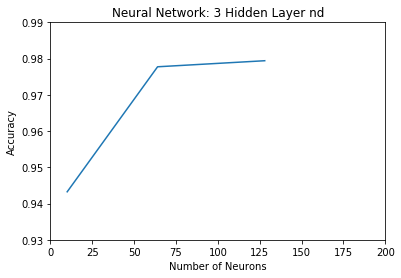

In [19]:
# we set the nunmber of neurons for each iterations 
neurons = [10,64,128]

accuracies_kfold = []

for n in neurons:
    kf = KFold(6, shuffle=True, random_state=1)
    # we set the MLP classifier with 3 hidden layers and the number of neurons 10, 64,128 
    mlp = MLPClassifier(hidden_layer_sizes=(n,n,n), max_iter=1000) 
    # we use 6 k-fold cross validation 
    accuracy = cross_val_score(mlp, fdf[features], fdf['labels'], scoring ='accuracy', cv=kf) 
    avg_accuracy = np.mean(accuracy)
    accuracies_kfold.append(avg_accuracy)
    
plt.plot(neurons, accuracies_kfold)
plt.title('Neural Network: 3 Hidden Layer nd')
plt.xlabel('Number of Neurons')
plt.ylabel('Accuracy')
plt.ylim(0.93, 0.99)
plt.xlim(0,200)
plt.show()






In conclusion, using neural nets over KNN is a better model choice. However, there is a marginal gain in accuracy from increasing the number of hidden layers. If the number of neurons reaches over 100 the model with 3 hidden layers improves accruacy marginally (no more than 1% increase). In turn, using 1 hidden layers seems to reach best model performance. 

Ideally, we want to fine tune the parameters using hyperparameter optimization as seen in the "random forest project" I have posted. Due to time constraints (hyperparamter tuning takes a long time to process in my home computer). Hyperparamter optimization will be done with other neural net projects on the upcoming projects instead. 